# Using BLE RSSI Values to Classify Proximity with Deep Neural Networks

In [1]:
import numpy as np
import pandas as pd
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
import visualkeras
import matplotlib.pyplot as plt

In [2]:
model_name = '1denselayers_hiddenlayersize64'

In [3]:
df = pd.read_csv("rssi_dataset_2.csv")

In [4]:
df

,Unnamed: 0,rssi,target
0,0,-91,0
1,1,-81,0
2,2,-87,0
3,3,-82,1
4,4,-90,0
...,...,...,...
11283,11283,-96,0
11284,11284,-80,0
11285,11285,-78,1
11286,11286,-102,0


In [5]:
train_labels = df['target']
train_samples = df['rssi']

In [6]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

In [7]:
scaled_train_samples = train_samples.reshape(-1,1)

In [8]:
print(scaled_train_samples)

[[ -91]
 [ -81]
 [ -87]
 ...
 [ -78]
 [-102]
 [ -88]]


In [9]:
print(train_labels)

[0 0 0 ... 1 0 0]


## Simple tf.keras Sequential Model

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, DenseFeatures
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow import lite
from keras.utils import plot_model

In [11]:
physial_devices = tf.config.experimental.list_physical_devices('GPU')
print("Available: ", len(physial_devices))

Available:  0


In [12]:
model = Sequential([
    Dense(units=64, input_shape=(1,), activation='relu'),
    Dropout(rate = 0.1),
    Dense(units=2, activation='softmax')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                128       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 258
Trainable params: 258
Non-trainable params: 0
_________________________________________________________________


In [14]:
visualkeras.layered_view(model, to_file= 'visualkeras/' + model_name + '.png')

In [15]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.2, batch_size=10, epochs=75, shuffle=True, verbose=2)

Epoch 1/75
903/903 - 1s - loss: 2.5240 - accuracy: 0.5971 - val_loss: 0.7560 - val_accuracy: 0.6980
Epoch 2/75
903/903 - 0s - loss: 2.0749 - accuracy: 0.6017 - val_loss: 0.7732 - val_accuracy: 0.6980
Epoch 3/75
903/903 - 1s - loss: 1.7814 - accuracy: 0.6044 - val_loss: 0.7115 - val_accuracy: 0.6980
Epoch 4/75
903/903 - 1s - loss: 1.5295 - accuracy: 0.6039 - val_loss: 0.7633 - val_accuracy: 0.6980
Epoch 5/75
903/903 - 1s - loss: 1.3194 - accuracy: 0.6043 - val_loss: 0.6978 - val_accuracy: 0.6980
Epoch 6/75
903/903 - 1s - loss: 1.1065 - accuracy: 0.6133 - val_loss: 0.6361 - val_accuracy: 0.6980
Epoch 7/75
903/903 - 1s - loss: 0.9574 - accuracy: 0.6271 - val_loss: 0.6498 - val_accuracy: 0.6980
Epoch 8/75
903/903 - 1s - loss: 0.8805 - accuracy: 0.6247 - val_loss: 0.6115 - val_accuracy: 0.6980
Epoch 9/75
903/903 - 0s - loss: 0.7808 - accuracy: 0.6320 - val_loss: 0.6028 - val_accuracy: 0.6980
Epoch 10/75
903/903 - 1s - loss: 0.7151 - accuracy: 0.6440 - val_loss: 0.5968 - val_accuracy: 0.6980

In [17]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


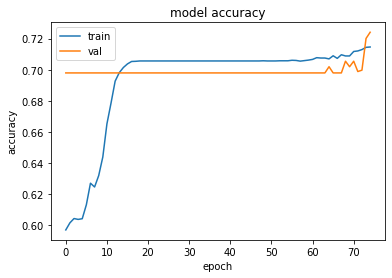

In [18]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('plots/accuracy_' + model_name + '.png')
plt.show()

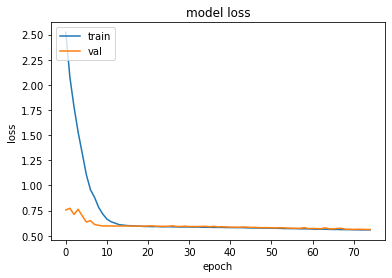

In [25]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
# plt.ylim(.55 , .65)
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('plots/loss_' + model_name + '.png')
plt.show()

## Predict

## Export Model

In [26]:
converter = lite.TFLiteConverter.from_keras_model(model)
tfmodel = converter.convert()
open("model_1_64.tflite", "wb").write(tfmodel)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:\Users\KAVINDA\AppData\Local\Temp\tmpu7cumrxk\assets


2344